**PART 1: Data Loading and Exploration**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

STEP 1: Loading the CIFAR-10 dataset

In [ ]:
"""
CIFAR-10 Dataset Overview:
- 60,000 32x32 color images in 10 classes
- 50,000 training images, 10,000 test images
- Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
"""

# Loading the dataset (this is built into TensorFlow)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("Dataset loaded successfully!")
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Dataset loaded successfully!
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

STEP 2: Explore and Understand the data

In [ ]:
# Some basic statistics
print("\n=== Dataset Statistics ===")
print(f"Number of classes: {len(class_names)}")
print(f"Image dimensions: {x_train.shape[1:3]}")
print(f"Number of color channels: {x_train.shape[3]}")
print(f"Pixel value range: {x_train.min()} to {x_train.max()}")

# Check the distribution of classes
unique, counts = np.unique(y_train, return_counts=True)
print(f"\nClass distribution in training set:")
for i, (class_idx, count) in enumerate(zip(unique, counts)):
    print(f"{class_names[class_idx]}: {count} images")



=== Dataset Statistics ===
Number of classes: 10
Image dimensions: (32, 32)
Number of color channels: 3
Pixel value range: 0 to 255

Class distribution in training set:
airplane: 5000 images
automobile: 5000 images
bird: 5000 images
cat: 5000 images
deer: 5000 images
dog: 5000 images
frog: 5000 images
horse: 5000 images
ship: 5000 images
truck: 5000 images


STEP 3: Visualize Sample Images


=== Sample Images ===


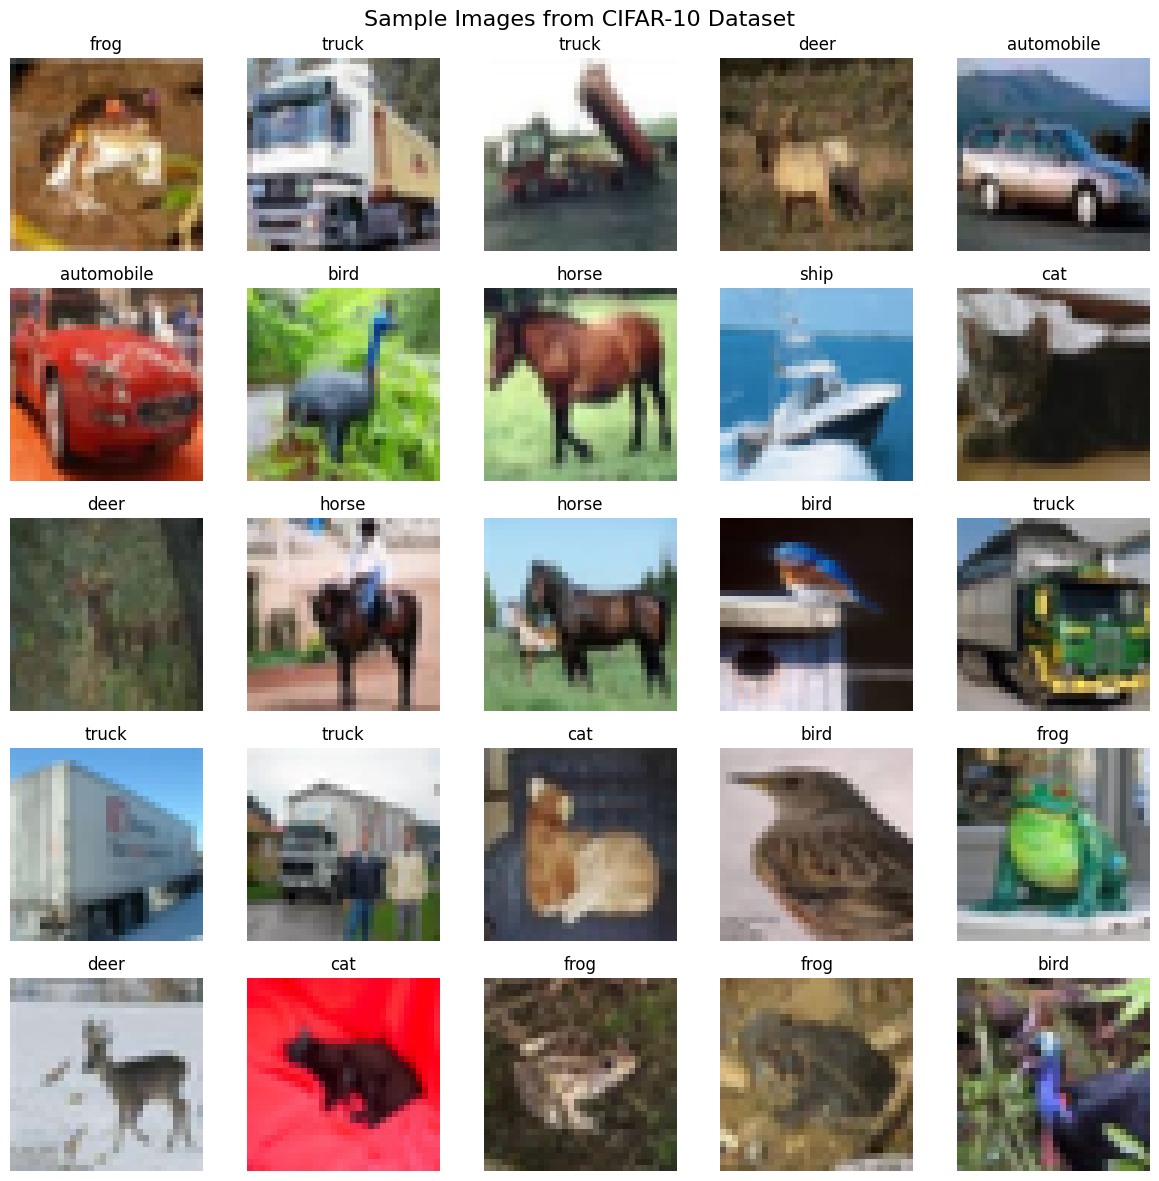

In [ ]:
def plot_sample_images(images, labels, class_names, num_samples=25):
    """
    Plot a grid of sample images with their labels
    """
    plt.figure(figsize=(12, 12))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'{class_names[labels[i][0]]}')
        plt.axis('off')

    plt.suptitle('Sample Images from CIFAR-10 Dataset', fontsize=16)
    plt.tight_layout()
    plt.show()

# Display sample images
print("\n=== Sample Images ===")
plot_sample_images(x_train, y_train, class_names)

STEP 4: Analyze Class Distribution


=== Class Distribution Analysis ===


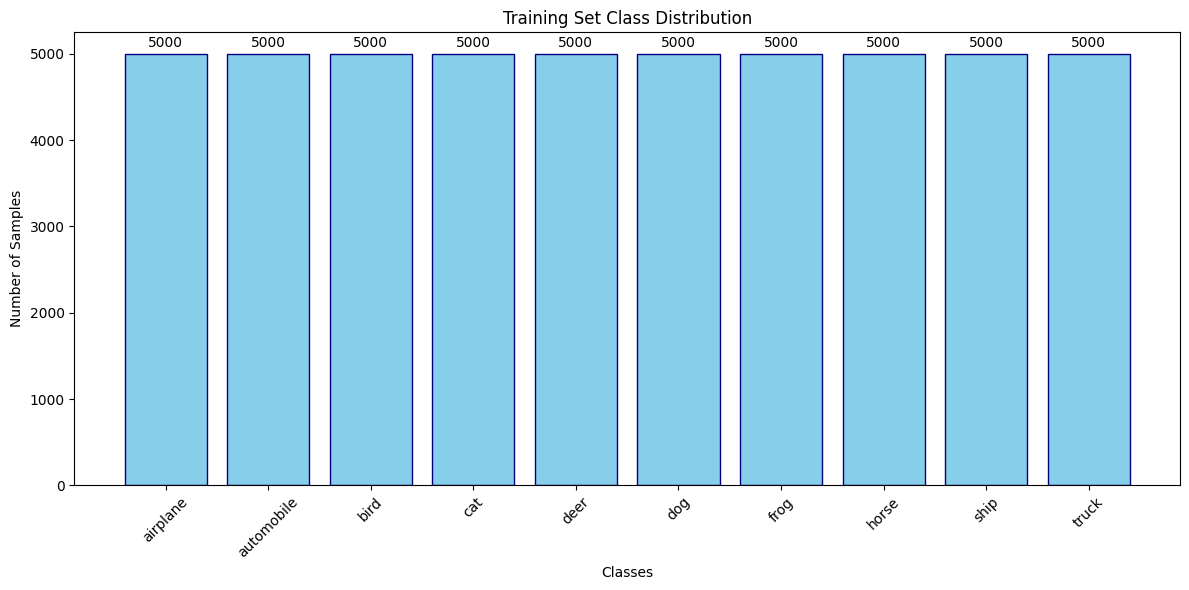

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [ ]:
def plot_class_distribution(labels, class_names, title="Class Distribution"):
    """
    Plot the distribution of classes in the dataset
    """
    unique, counts = np.unique(labels, return_counts=True)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(class_names)), counts, color='skyblue', edgecolor='navy')
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.title(title)
    plt.xticks(range(len(class_names)), class_names, rotation=45)

    # Add count labels on bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

print("\n=== Class Distribution Analysis ===")
plot_class_distribution(y_train, class_names, "Training Set Class Distribution")

for cls, count in zip(class_names, counts):
    print(f"{cls}: {count}")


STEP 5: Examine Pixel Values


=== Training Images Analysis ===
Image shape: (50000, 32, 32, 3)
Data type: uint8
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 120.71
Standard deviation: 64.15


Text(0.5, 1.0, 'Distribution of Pixel Values')

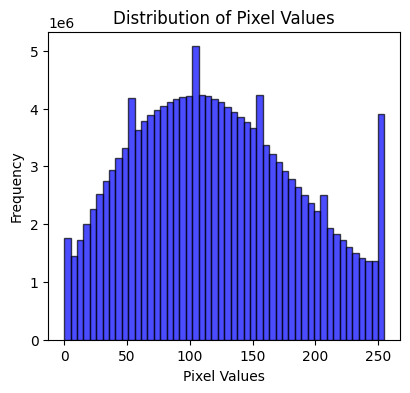

In [ ]:
print(f"\n=== Training Images Analysis ===")
print(f"Image shape: {x_train.shape}")
print(f"Data type: {x_train.dtype}")
print(f"Min pixel value: {x_train.min()}")
print(f"Max pixel value: {x_train.max()}")
print(f"Mean pixel value: {x_train.mean():.2f}")
print(f"Standard deviation: {x_train.std():.2f}")

# Plot histogram of pixel values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(x_train.flatten(), bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Values')


**PART 2:** **DATA PREPROCESSING**



STEP 1: Normalization

In [ ]:
"""
WHY NORMALIZE?
- Neural networks work better with smaller numbers (0-1 range)
- Prevents gradient problems during training
- Makes training faster and more stable
- All features (pixels) are on the same scale
"""

# Before Normalization
x_train.mean()
x_train.max()
x_train.min()
print("Before normalization:")
print(f"Min pixel value: {x_train.min()}")
print(f"Max pixel value: {x_train.max()}")
print(f"Mean pixel value: {x_train.mean():.2f}")

# Normalize the data (divide by 255 to get 0-1 range)
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# After Normalization
x_train_normalized.mean()
x_train_normalized.max()
x_train_normalized.min()
print("\nAfter normalization:")
print(f"Min pixel value: {x_train_normalized.min()}")
print(f"Max pixel value: {x_train_normalized.max()}")
print(f"Mean pixel value: {x_train_normalized.mean():.2f}")

Before normalization:
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 120.71

After normalization:
Min pixel value: 0.0
Max pixel value: 1.0
Mean pixel value: 0.47


STEP 2: Encoding

In [ ]:
# Before one-hot encoding
y_train.shape
y_train[:10].flatten()
y_train.dtype
print("Before one-hot encoding:")
print(f"Label shape: {y_train.shape}")
print(f"First 10 labels: {y_train[:10].flatten()}")
print(f"Label data type: {y_train.dtype}")

# Convert to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# After one-hot encoding
y_train_onehot.shape
y_train_onehot[0]
y_train_onehot[1]
y_train_onehot.dtype
y_train_onehot[:10]

print("\nAfter one-hot encoding:")
print(f"Label shape: {y_train_onehot.shape}")
print(f"First label: {y_train_onehot[0]}")
print(f"Second label: {y_train_onehot[1]}")
print(f"Label data type: {y_train_onehot.dtype}")
print(f"First 10 labels: {y_train_onehot[:10]}")


Before one-hot encoding:
Label shape: (50000, 1)
First 10 labels: [6 9 9 4 1 1 2 7 8 3]
Label data type: uint8

After one-hot encoding:
Label shape: (50000, 10)
First label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Second label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Label data type: float64
First 10 labels: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


STEP 3: Create Validation Set

In [ ]:
"""
WHY VALIDATION SET?
- To monitor training progress
- Detect overfitting early
- Choose best model hyperparameters
- Final test set should only be used once at the end
"""

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create validation split from training data
validation_split = 0.2  # 20% of training data for validation
split_index = int(len(x_train_normalized) * (1 - validation_split))

# Split the data
x_train_final = x_train_normalized[:split_index]
y_train_final = y_train_onehot[:split_index]

x_val = x_train_normalized[split_index:]
y_val = y_train_onehot[split_index:]

# Keep test set as is
x_test_final = x_test_normalized
y_test_final = y_test_onehot

print("Data split summary:")
print(f"Training set: {x_train_final.shape[0]} images")
print(f"Validation set: {x_val.shape[0]} images")
print(f"Test set: {x_test_final.shape[0]} images")
print(f"Total: {x_train_final.shape[0] + x_val.shape[0] + x_test_final.shape[0]} images")

Data split summary:
Training set: 40000 images
Validation set: 10000 images
Test set: 10000 images
Total: 60000 images


STEP 4: Data Augmentation

In [ ]:
"""
WHY DATA AUGMENTATION?
- Artificially increases dataset size
- Makes model more robust to variations
- Reduces overfitting
- Common augmentations: rotation, flip, zoom, shift
"""

# Create data augmentation pipeline
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),   # Flip images left-right
    layers.RandomRotation(0.1),        # Rotate up to 10% (36 degrees)
    layers.RandomZoom(0.1),             # Zoom in/out up to 10%
    layers.RandomTranslation(0.1, 0.1),  # Shift up to 10% in both directions
])

**PART 3: CNN MODEL ARCHITECTURE**

In [ ]:
# Understanding CNN building blocks
"""
EXPLANATION OF CNN LAYERS:

1. CONVOLUTIONAL LAYER (Conv2D):
   - Detects features like edges, shapes, patterns
   - Uses filters/kernels to scan the image
   - Example: 32 filters of size 3x3

2. ACTIVATION LAYER (ReLU):
   - Introduces non-linearity
   - ReLU(x) = max(0, x) - removes negative values

3. POOLING LAYER (MaxPooling2D):
   - Reduces image size while keeping important features
   - Makes model more efficient and less prone to overfitting

4. DROPOUT LAYER:
   - Randomly turns off some neurons during training
   - Prevents overfitting

5. DENSE LAYER (Fully Connected):
   - Traditional neural network layer
   - Final layer outputs probabilities for each class
"""

STEP 1: Build CNN

In [ ]:
def create_custom_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        # Shape of input images
        layers.Input(shape=input_shape),

        # Feature Detection
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # More Complex Features
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # High-Level Features
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Classification Head
        layers.Flatten(),  # Convert 2D feature maps to 1D
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')  # Output probabilities
    ])

    return model

# Create the model
print("Creating custom CNN model...")
custom_cnn = create_custom_cnn()

# Display model architecture
print("\n=== MODEL ARCHITECTURE ===")
custom_cnn.summary()


Creating custom CNN model...

=== MODEL ARCHITECTURE ===


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,469,994 (5.61 MB)

 Trainable params: 1,469,994 (5.61 MB)

 Non-trainable params: 0 (0.00 B)

STEP 2: Compiled the Model

In [ ]:
"""
EXPLANATION OF COMPILATION CHOICES:

OPTIMIZER - Adam:
- Adaptive learning rate
- Works well for most problems
- Good default choice

LOSS FUNCTION - Categorical Crossentropy:
- Standard for multi-class classification
- Works with one-hot encoded labels

METRICS - Accuracy:
- Easy to understand percentage of correct predictions
- Good for balanced datasets
"""

custom_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


STEP 3: Setup Training Callbacks

In [ ]:
"""
CALLBACKS FOR BETTER TRAINING:

1. EarlyStopping: Stops training if validation accuracy stops improving
2. ReduceLROnPlateau: Reduces learning rate when training plateaus
3. ModelCheckpoint: Saves the best model during training
"""

# Create callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

model_checkpoint = callbacks.ModelCheckpoint(
    'best_custom_cnn.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

callback_list = [early_stopping, reduce_lr, model_checkpoint]

STEP 4: Train Custom CNN

In [ ]:
# Training Parameters
BATCH_SIZE = 32
EPOCHS = 15

x_train_final.shape[0]
x_val.shape[0]

print(f"Training parameters:")
print(f"- Batch size: {BATCH_SIZE}")
print(f"- Max epochs: {EPOCHS}")
print(f"- Training samples: {x_train_final.shape[0]}")
print(f"- Validation samples: {x_val.shape[0]}")

# Add data augmenting to training
def create_augmented_dataset(x_train, y_train, batch_size):
    """Create augmented training dataset"""
    dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(
        lambda x, y: (data_augmentation(x, training=True), y),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# Create training dataset with augmentation
train_dataset = create_augmented_dataset(x_train_final, y_train_final, BATCH_SIZE)

# Create validation dataset (no augmentation)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

# Train the model
history = custom_cnn.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset, callbacks=callback_list, verbose=1)

Training parameters:
- Batch size: 32
- Max epochs: 15
- Training samples: 40000
- Validation samples: 10000
Epoch 1/15
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0972 - loss: 2.3026
Epoch 1: val_accuracy did not improve from 0.10250
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0972 - loss: 2.3026 - val_accuracy: 0.1025 - val_loss: 2.3026 - learning_rate: 4.0000e-05
Epoch 2/15
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0957 - loss: 2.3026
Epoch 2: val_accuracy did not improve from 0.10250
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0957 - loss: 2.3026 - val_accuracy: 0.1025 - val_loss: 2.3027 - learning_rate: 4.0000e-05
Epoch 3/15
1237/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0975 - loss: 2.3027
Epoch 3: val_accuracy did not improve from 0.10250
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0975 - loss: 2.3027 - val_accuracy: 0.1025 - val_loss: 2.3027 - learning_rate: 4.0000e-05
Epoch 4/15
1238/1250 ━━━━━━━━━━━━

STEP 5: Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

# Predictions
val_predictions = custom_cnn.predict(val_dataset, verbose=0)

# Convert predictions and true labels from one-hot to class indices
val_pred_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(y_val, axis=1)

print(f"Predictions shape: {val_predictions.shape}")
print(f"Number of validation samples: {len(val_true_classes)}")

# Calculate per-class metrics
precision, recall, f1, support = precision_recall_fscore_support(val_true_classes, val_pred_classes, average=None)

# Calculate per-class accuracy
from sklearn.metrics import accuracy_score
cm = confusion_matrix(val_true_classes, val_pred_classes)
per_class_accuracy = np.diag(cm) / np.sum(cm, axis=1)

# Overall accuracy
overall_accuracy = accuracy_score(val_true_classes, val_pred_classes)

# Calculate overall metrics
precision_macro = precision_recall_fscore_support(val_true_classes, val_pred_classes, average='macro')[0]
recall_macro = precision_recall_fscore_support(val_true_classes, val_pred_classes, average='macro')[1]
f1_macro = precision_recall_fscore_support(val_true_classes, val_pred_classes, average='macro')[2]

precision_weighted = precision_recall_fscore_support(val_true_classes, val_pred_classes, average='weighted')[0]
recall_weighted = precision_recall_fscore_support(val_true_classes, val_pred_classes, average='weighted')[1]
f1_weighted = precision_recall_fscore_support(val_true_classes, val_pred_classes, average='weighted')[2]

print("\n=== OVERALL PERFORMANCE METRICS ===")
print(f"Overall Accuracy: {overall_accuracy:.4f} ({overall_accuracy*100:.2f}%)")
print(f"Average Per-Class Accuracy: {np.mean(per_class_accuracy):.4f} ({np.mean(per_class_accuracy)*100:.2f}%)")
print(f"\nMacro Average (treats all classes equally):")
print(f"  Precision: {precision_macro:.4f} ({precision_macro*100:.2f}%)")
print(f"  Recall:    {recall_macro:.4f} ({recall_macro*100:.2f}%)")
print(f"  F1 Score:  {f1_macro:.4f} ({f1_macro*100:.2f}%)")
print(f"\nWeighted Average (accounts for class frequency):")
print(f"  Precision: {precision_weighted:.4f} ({precision_weighted*100:.2f}%)")
print(f"  Recall:    {recall_weighted:.4f} ({recall_weighted*100:.2f}%)")
print(f"  F1 Score:  {f1_weighted:.4f} ({f1_weighted*100:.2f}%)")


Predictions shape: (10000, 10)
Number of validation samples: 10000

=== OVERALL PERFORMANCE METRICS ===
Overall Accuracy: 0.1025 (10.25%)
Average Per-Class Accuracy: 0.1000 (10.00%)

Macro Average (treats all classes equally):
  Precision: 0.0102 (1.02%)
  Recall:    0.1000 (10.00%)
  F1 Score:  0.0186 (1.86%)

Weighted Average (accounts for class frequency):
  Precision: 0.0105 (1.05%)
  Recall:    0.1025 (10.25%)
  F1 Score:  0.0191 (1.91%)


STEP 6: Confusion Matrix Analysis

In [ ]:
# Confusion Matrix

def plot_confusion_matrix(y_true, y_pred, class_names):
    """Plot confusion matrix with class names"""
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return cm

print("\n=== CONFUSION MATRIX ANALYSIS ===")
cm = plot_confusion_matrix(val_true_classes, val_pred_classes, class_names)

# Detailed Classification Report
print("\n=== DETAILED CLASSIFICATION REPORT ===")
report = classification_report(val_true_classes, val_pred_classes, target_names=class_names, digits=4)
print(report)


**PART 4: TRANSFER LEARNING**

In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2


STEP 1: Understanding Transfer Learning

In [ ]:
"""
TRANSFER LEARNING EXPLAINED:

1. PRE-TRAINED MODEL:
   - Model trained on large dataset (ImageNet - 1.4M images, 1000 classes)
   - Learned general features like edges, shapes, textures
   - Lower layers: basic features (edges, colors)
   - Higher layers: complex patterns (objects, scenes)

2. TRANSFER STRATEGIES:
   - Feature Extraction: Freeze pre-trained layers, train only new classifier
   - Fine-tuning: Unfreeze some layers and train with very low learning rate
   - Full Fine-tuning: Train entire model with low learning rate

3. WHY IT WORKS:
   - Pre-trained features are general and transferable
   - Much faster than training from scratch
   - Better performance with limited data
   - Reduces overfitting
"""

STEP 2: Prepare Data for Transfer Learning

In [ ]:
"""
Pre-trained models expect different input sizes
- CIFAR-10: 32x32 images
- ImageNet models: usually 224x224 images
- Solution: Resize images or use models that accept smaller inputs
"""
def resize_and_normalize(images, target_size=(96, 96)):
    resized_images = [tf.image.resize(image, target_size).numpy() / 255.0 for image in images]
    return np.array(resized_images)

x_train_resized = resize_and_normalize(x_train_final)
x_val_resized = resize_and_normalize(x_val)
x_test_resized = resize_and_normalize(x_test_final)

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
x_train_rgb = preprocess_input(x_train_resized)
x_test_rgb = preprocess_input(x_test_resized)

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
import tensorflow as tf

def resize_images(images, size=(96,96)):
    return tf.image.resize(images, size)

x_train_resized = resize_images(x_train, (96, 96))
x_test_resized = resize_images(x_test, (96, 96))

In [ ]:
x_train = preprocess_input(x_train_resized)
x_test = preprocess_input(x_test_resized)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'  # Global average pooling at the end of base
)

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
y_test_cat = to_categorical(y_test, 10)
y_train_cat = to_categorical(y_train, 10)
# Freeze the base_model layers to start (optional)
base_model.trainable = False

# Build the classification head
model = models.Sequential([
    base_model,
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train_cat,
    epochs=15,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.7262 - loss: 0.8273 - val_accuracy: 0.8486 - val_loss: 0.4323
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8507 - loss: 0.4404 - val_accuracy: 0.8598 - val_loss: 0.4045
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8707 - loss: 0.3821 - val_accuracy: 0.8580 - val_loss: 0.4069
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8812 - loss: 0.3493 - val_accuracy: 0.8636 - val_loss: 0.3985
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8911 - loss: 0.3124 - val_accuracy: 0.8625 - val_loss: 0.4002
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8982 - loss: 0.2916 - val_accuracy: 0.8652 - val_loss: 0.4029
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9088 - loss: 0.2630 - val_accuracy: 0.8666 - val_loss: 0.4214
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9130 - loss: 0.2487 - val_accura

In [ ]:
# Evaluate
loss, acc = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8707 - loss: 0.4906
Test accuracy: 0.8640


In [ ]:
# Build transfer learning model
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

In [ ]:


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(), # Pool spatial features into a vector
    layers.Dense(128, activation='relu'), # Fully connected layer to learn new patterns
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (Fashion MNIST)
])

In [ ]:
# Compile model
# Compile the model with Adam optimizer and categorical crossentropy loss

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train
history = model.fit(x_train_rgb, y_train_cat, validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.1028 - loss: 2.3582 - val_accuracy: 0.1014 - val_loss: 2.3046
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0981 - loss: 2.3031 - val_accuracy: 0.1025 - val_loss: 2.3027
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1013 - loss: 2.3027 - val_accuracy: 0.1025 - val_loss: 2.3027
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1012 - loss: 2.3027 - val_accuracy: 0.1025 - val_loss: 2.3027
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1013 - loss: 2.3027 - val_accuracy: 0.1025 - val_loss: 2.3027


STEP 3: Create Transfer Learning Models

In [ ]:
def create_transfer_model(base_model_name, input_shape=(96, 96, 3), num_classes=10):
    """
    Create a transfer learning model with different base architectures
    """
    # Get the base model (pre-trained on ImageNet)
    if base_model_name == 'VGG16':
        base_model = VGG16(weights='imagenet',
                          include_top=False,
                          input_shape=input_shape)
    elif base_model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet',
                             include_top=False,
                             input_shape=input_shape)
    elif base_model_name == 'MobileNetV2':
        base_model = MobileNetV2(weights='imagenet',
                                include_top=False,
                                input_shape=input_shape)
    else:
        raise ValueError("Unsupported model name")

    # Freeze the base model initially
    base_model.trainable = False

    # Add custom classification head
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model, base_model

STEP 4: Compare Different Pre-Trained Models

In [ ]:
print("\n=== CREATING TRANSFER LEARNING MODELS ===")

# Create different transfer learning models
models_to_compare = ['VGG16', 'ResNet50', 'MobileNetV2']
transfer_models = {}
base_models = {}

for model_name in models_to_compare:
    print(f"\nCreating {model_name} transfer learning model...")
    model, base_model = create_transfer_model(model_name)
    transfer_models[model_name] = model
    base_models[model_name] = base_model

    print(f"{model_name} model created")
    print(f"   - Base model parameters: {base_model.count_params():,}")
    print(f"   - Total parameters: {model.count_params():,}")
    print(f"   - Trainable parameters: {sum([tf.reduce_prod(var.shape) for var in model.trainable_variables]):,}")



=== CREATING TRANSFER LEARNING MODELS ===

Creating VGG16 transfer learning model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
VGG16 model created
   - Base model parameters: 14,714,688
   - Total parameters: 14,781,642
   - Trainable parameters: 66,954

Creating ResNet50 transfer learning model...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
ResNet50 model created
   - Base model parameters: 23,587,712
   - Total parameters: 23,851,274
   - Trainable parameters: 263,562

Creating MobileNetV2 transfer learning model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MobileNetV2 model created
   - Base model parameters: 2,257,984
   - Total parameters: 2,423,242
   - Trainable parameters: 165,258


In [ ]:
import keras

STEP 5: Train Transfer Learning Models


In [ ]:
def train_transfer_model(model, model_name, x_train, y_train, x_val, y_val):
    """Train a transfer learning model with two stages"""

    print(f"\n Training {model_name} Transfer Learning Model...")

    # Compile model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Create callbacks
    early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

    reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1)

    # Stage 1: Train with frozen base model(Feature Extraction)
    print(f"Stage 1: Training classifier head (base model frozen)...")

    history_stage1 = model.fit(
        x_train, y_train,
        batch_size=32,
        epochs=10,
        validation_data=(x_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Stage 2: Fine-tune with unfrozen layers
    print(f"Stage 2: Fine-tuning (unfreezing some layers)...")

    # Unfreeze some layers for fine-tuning
    base_model = model.layers[0]
    base_model.trainable = True

    # Freeze early layers, unfreeze later layers
    for layer in base_model.layers[:-20]:  # Freeze all but last 20 layers
        layer.trainable = False

    # Recompile with lower learning rate for fine-tuning
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Continue training
    history_stage2 = model.fit(
        x_train, y_train,
        batch_size=32,
        epochs=10,
        validation_data=(x_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Combine training histories
    combined_history = {
        'accuracy': history_stage1.history['accuracy'] + history_stage2.history['accuracy'],
        'val_accuracy': history_stage1.history['val_accuracy'] + history_stage2.history['val_accuracy'],
        'loss': history_stage1.history['loss'] + history_stage2.history['loss'],
        'val_loss': history_stage1.history['val_loss'] + history_stage2.history['val_loss']
    }

    return model, combined_history

# Train all transfer learning models
print("\n=== TRAINING ALL TRANSFER LEARNING MODELS ===")

trained_models = {}
training_histories = {}

for model_name in models_to_compare:
    model = transfer_models[model_name]
    trained_model, history = train_transfer_model(
        model, model_name,
        x_train, y_train_cat,
        x_test, y_test_cat
    )
    trained_models[model_name] = trained_model
    training_histories[model_name] = history

    # Quick evaluation
    val_loss, val_accuracy = trained_model.evaluate(x_test, y_test_cat, verbose=0)
    print(f"{model_name} - Final Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")



=== TRAINING ALL TRANSFER LEARNING MODELS ===

 Training VGG16 Transfer Learning Model...
Stage 1: Training classifier head (base model frozen)...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4303 - loss: 1.6363 - val_accuracy: 0.6779 - val_loss: 0.9705 - learning_rate: 0.0010
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5862 - loss: 1.1861 - val_accuracy: 0.6939 - val_loss: 0.9207 - learning_rate: 0.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5987 - loss: 1.1399 - val_accuracy: 0.7003 - val_loss: 0.9102 - learning_rate: 0.0010
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6080 - loss: 1.1242 - val_accuracy: 0.7056 - val_loss: 0.8932 - learning_rate: 0.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6191 - loss: 1.0945 - val_accuracy: 0.7137 - val_loss: 0.8762 - learning_rate: 0.0010
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6163 - 

STEP 6: Compare all Model Performance

In [ ]:
print("\n=== MODEL COMPARISON ===")

# Create comparison dataframe
model_comparison = {}

try:
    custom_val_loss, custom_val_acc = custom_cnn.evaluate(x_val, y_val, verbose=0)
    model_comparison['Custom CNN'] = {
        'val_accuracy': custom_val_acc,
        'val_loss': custom_val_loss,
        'parameters': custom_cnn.count_params()
    }
except:
    print(" Custom CNN not found, skipping comparison")

# Add transfer learning results
for model_name in models_to_compare:
    model = trained_models[model_name]
    val_loss, val_accuracy = model.evaluate(x_val_resized, y_val, verbose=0)
    model_comparison[model_name] = {
        'val_accuracy': val_accuracy,
        'val_loss': val_loss,
        'parameters': model.count_params()
    }

# Display comparison table
print("\n MODEL PERFORMANCE COMPARISON:")
print("-" * 70)
print(f"{'Model':<15} {'Val Accuracy':<15} {'Val Loss':<12} {'Parameters':<15}")
print("-" * 70)

for model_name, metrics in model_comparison.items():
    acc = metrics['val_accuracy']
    loss = metrics['val_loss']
    params = metrics['parameters']
    print(f"{model_name:<15} {acc:.4f} ({acc*100:.1f}%){'':<3} {loss:.4f}{'':<6} {params:,}")

print("-" * 70)

# Find best model
best_model_name = max(model_comparison.keys(), key=lambda x: model_comparison[x]['val_accuracy'])
best_accuracy = model_comparison[best_model_name]['val_accuracy']
print(f"Best Model: {best_model_name} with {best_accuracy:.4f} ({best_accuracy*100:.2f}%) accuracy")


=== MODEL COMPARISON ===

 MODEL PERFORMANCE COMPARISON:
----------------------------------------------------------------------
Model           Val Accuracy    Val Loss     Parameters     
----------------------------------------------------------------------
Custom CNN      0.1025 (10.2%)    2.3026       1,469,994
VGG16           0.1003 (10.0%)    3.5511       14,781,642
ResNet50        0.1014 (10.1%)    4.3535       23,851,274
MobileNetV2     0.1014 (10.1%)    6.4727       2,423,242
----------------------------------------------------------------------
Best Model: Custom CNN with 0.1025 (10.25%) accuracy


In [ ]:
print("\n=== MODEL COMPARISON ===")

# Create comparison dataframe
model_comparison = {}

# Variable to store the best model object and its accuracy
best_model_object = None
highest_accuracy = -1.0

try:
    # Evaluate the custom CNN
    custom_val_loss, custom_val_acc = custom_cnn.evaluate(x_val, y_val, verbose=0)
    model_comparison['Custom CNN'] = {
        'val_accuracy': custom_val_acc,
        'val_loss': custom_val_loss,
        'parameters': custom_cnn.count_params()
    }
    # Update best model if Custom CNN is better
    if custom_val_acc > highest_accuracy:
        highest_accuracy = custom_val_acc
        best_model_name = 'Custom CNN'
        best_model_object = custom_cnn

except Exception as e:
    print(f" Error evaluating Custom CNN: {e}. Skipping comparison.")
    # If Custom CNN evaluation fails, ensure best_model_name is not 'Custom CNN' initially
    best_model_name = None # Initialize best_model_name only if Custom CNN is successfully evaluated

# Add transfer learning results and update best model
for model_name in models_to_compare:
    model = trained_models[model_name]
    # Use validation data for comparison, consistent with custom CNN
    val_loss, val_accuracy = model.evaluate(x_val_resized, y_val, verbose=0)
    model_comparison[model_name] = {
        'val_accuracy': val_accuracy,
        'val_loss': val_loss,
        'parameters': model.count_params()
    }
    # Update best model if this transfer learning model is better
    if val_accuracy > highest_accuracy:
        highest_accuracy = val_accuracy
        best_model_name = model_name
        best_model_object = model

# Display comparison table
print("\n MODEL PERFORMANCE COMPARISON:")
print("-" * 70)
print(f"{'Model':<15} {'Val Accuracy':<15} {'Val Loss':<12} {'Parameters':<15}")
print("-" * 70)

# Sort models for display (optional but nice)
sorted_models = sorted(model_comparison.items(), key=lambda item: item[1]['val_accuracy'], reverse=True)

for model_name, metrics in sorted_models:
    acc = metrics['val_accuracy']
    loss = metrics['val_loss']
    params = metrics['parameters']
    print(f"{model_name:<15} {acc:.4f} ({acc*100:.1f}%){'':<3} {loss:.4f}{'':<6} {params:,}")

print("-" * 70)

# Ensure a best model was found
if best_model_object is not None:
    print(f"Best Model: {best_model_name} with {highest_accuracy:.4f} ({highest_accuracy*100:.2f}%) accuracy on validation data")
else:
     print("No models were successfully evaluated for comparison.")



=== MODEL COMPARISON ===

 MODEL PERFORMANCE COMPARISON:
----------------------------------------------------------------------
Model           Val Accuracy    Val Loss     Parameters     
----------------------------------------------------------------------
Custom CNN      0.1025 (10.2%)    2.3026       1,469,994
ResNet50        0.1014 (10.1%)    4.3535       23,851,274
MobileNetV2     0.1014 (10.1%)    6.4727       2,423,242
VGG16           0.1003 (10.0%)    3.5511       14,781,642
----------------------------------------------------------------------
Best Model: Custom CNN with 0.1025 (10.25%) accuracy on validation data


In [ ]:
if best_model_object is not None:
    print(f"\n=== DETAILED EVALUATION OF BEST MODEL ({best_model_name}) ===")

    # Use the appropriate test data based on the best model type
    if best_model_name == 'Custom CNN':
         x_test_for_best_model = x_test_final
         y_test_for_best_model = y_test_final
    else: # Transfer learning models use resized data
         x_test_for_best_model = x_test_resized
         y_test_for_best_model = y_test_final # y_test_final is already one-hot encoded

    # Evaluate on test set
    test_loss, test_accuracy = best_model_object.evaluate(x_test_for_best_model, y_test_for_best_model, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"Test Loss: {test_loss:.4f}")

    # Generate predictions for confusion matrix
    y_pred = best_model_object.predict(x_test_for_best_model, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test_for_best_model, axis=1)

    # Classification report
    print(f"\n Classification Report for {best_model_name}:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    print("\n" + "="*60)
    print("MODEL EVALUATION COMPLETED!")
    print("="*60)
    print(f"Best performing model: {best_model_name}")
    print("="*60)
else:
    print("\nCannot perform detailed evaluation as no best model was determined.")

STEP 8: Evaluation of Best Model

In [ ]:
print(f"\n=== DETAILED EVALUATION OF BEST MODEL ({best_model_name}) ===")

best_model = trained_models[best_model_name]

# Evaluate on test set
test_loss, test_accuracy = best_model.evaluate(x_test_resized, y_test_final, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions for confusion matrix
y_pred = best_model.predict(x_test_resized, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_final, axis=1)

# Classification report
print(f"\n Classification Report for {best_model_name}:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TRANSFER LEARNING COMPLETED!")
print("="*60)
print(f"Best performing model: {best_model_name}")
print("="*60)
